# **INTRODUCTION**

Objective: Focus on analyzing products and reviews from Amazon data to learn about discount trends, customer satisfaction, and correlations between factors.

Dataset: Includes information about products, prices, ratings, and review content.

In [70]:
#Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#Importing Files

df = pd.read_csv("amazon.csv")

# **DATA CLEANING & PREPARATION**

In [72]:
#Checking out First Few Rows

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [73]:
#Dropping unessary column
df.drop('user_name', axis=1, inplace=True)

In [74]:
#Checking Column Names

df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [75]:
#Checking Number of Rows and Columns

df.shape

(1465, 15)

In [76]:
#Checking Data Types for each Column

df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [77]:
# Check for missing values
missing_values = df.isnull().sum()

In [78]:
missing_values

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

It can see that there are 2 missing value in rating_count
I will handle the missing values ​​using the elimination method since there are only 2 missing data.

In [79]:
df = df.dropna(subset=['rating_count'])


Duplicate Data

In [80]:
duplicates = df.duplicated(subset=['product_id', 'review_id'])
# Remove duplicate records
df = df.drop_duplicates(subset=['product_id', 'review_id'])
print(f'Number of duplicate records remaining: {df.duplicated().sum()}')

Number of duplicate records remaining: 0


Invalid Data

In [81]:
#Changing the data type of discounted price and actual price

df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')


In [82]:
# Loại bỏ các bản ghi có giá trị không hợp lý
df = df[df['actual_price'] > 0]  # Loại bỏ các giá trị âm hoặc bằng 0

In [83]:
# Xử lý các sản phẩm có discounted_price lớn hơn actual_price
df = df[df['discounted_price'] <= df['actual_price']] 

Text Data Cleaning

In [84]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [85]:
#Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

df['discount_percentage']

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1359, dtype: float64

In [86]:
#Finding unusual string in the rating column

df['rating'].value_counts()

rating
4.1    227
4.3    211
4.2    208
3.9    117
4.4    114
4.0    109
3.8     84
4.5     68
4       52
3.7     41
3.6     34
3.5     26
4.6     16
3.3     15
3.4     10
4.7      6
3.1      4
4.8      3
5.0      2
3.2      2
2.8      2
3.0      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [87]:
#Inspecting the strange row

df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [88]:
df = df[df['product_id'] != 'B08L12N5H1']

In [89]:
#Changing Rating Columns Data Type

df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')

In [90]:
#Changing Rating Column Data Type

df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [91]:
#Checking for Duplicates

duplicates = df.duplicated()
df[duplicates]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_id,review_title,review_content,img_link,product_link


In [92]:
#Checking Missing Values

df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [93]:
#Creating a new DataFrame with Selected Column

df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

In [94]:
#Splitting the Strings in the category column

catsplit = df['category'].str.split('|', expand=True)
catsplit

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [95]:
#Renaming category column

catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})

In [96]:
#Adding categories to the new dataframe

df1['category_1'] = catsplit['category_1']
df1['category_2'] = catsplit['category_2']

df1.drop(columns='category', inplace=True)

df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home&Kitchen,Kitchen&HomeAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home&Kitchen,"Heating,Cooling&AirQuality"


In [97]:
#Checking category_1 unique values

df1['category_1'].value_counts()

category_1
Electronics              496
Home&Kitchen             447
Computers&Accessories    377
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [98]:
#Fixing Strings in the Category_1 Column

df1['category_1'] = df1['category_1'].str.replace('&', ' & ')
df1['category_1'] = df1['category_1'].str.replace('OfficeProducts', 'Office Products')
df1['category_1'] = df1['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
df1['category_1'] = df1['category_1'].str.replace('HomeImprovement', 'Home Improvement')


In [99]:
#Checking category_2 unique values

df1['category_2'].value_counts()

category_2
Accessories&Peripherals                    309
Kitchen&HomeAppliances                     307
HomeTheater,TV&Video                       156
Mobiles&Accessories                        151
Heating,Cooling&AirQuality                 116
WearableTechnology                          67
Headphones,Earbuds&Accessories              63
NetworkingDevices                           30
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 12
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Microphones                                  2
Monitors                                     2
El

In [100]:
#Fixing Strings in Category_2 column

df1['category_2'] = df1['category_2'].str.replace('&', ' & ')
df1['category_2'] = df1['category_2'].str.replace(',', ', ')
df1['category_2'] = df1['category_2'].str.replace('HomeAppliances', 'Home Appliances')
df1['category_2'] = df1['category_2'].str.replace('AirQuality', 'Air Quality')
df1['category_2'] = df1['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
df1['category_2'] = df1['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
df1['category_2'] = df1['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
df1['category_2'] = df1['category_2'].str.replace('ExternalDevices', 'External Devices')
df1['category_2'] = df1['category_2'].str.replace('DataStorage', 'Data Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeStorage', 'Home Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeAudio', 'Home Audio')
df1['category_2'] = df1['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
df1['category_2'] = df1['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
df1['category_2'] = df1['category_2'].str.replace('CraftMaterials', 'Craft Materials')
df1['category_2'] = df1['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
df1['category_2'] = df1['category_2'].str.replace('PowerAccessories', 'Power Accessories')
df1['category_2'] = df1['category_2'].str.replace('CarAccessories', 'Car Accessories')
df1['category_2'] = df1['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
df1['category_2'] = df1['category_2'].str.replace('HomeTheater', 'Home Theater')

In [101]:
# Removing Whitespace from product_id

df1['product_id'].str.strip()

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1358, dtype: object

In [102]:
#Creating Difference of Price Column between Actual Price and Discounted Price

df1['difference_price'] = df1['actual_price'] - df1['discounted_price']

In [103]:
#Result After Cleaning and Preperation after first cleaned dataframe

df1.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,245.0


# **DATA EXPLORATION**

In this stage I will try to elaborate my insights through Visualizations, Pivot Tables, and short explanations.

In [104]:
#Setting Visualization Style

sns.set_style(style='darkgrid')

sns.set_palette(palette="icefire")

## **Observation 1: Product Category**

Below are the list of **Main Category** and **Sub-Category** to help determine which sub-category belongs to which main category:

In [105]:
#Main Category and Sub-Category

main_sub = df1[['category_1', 'category_2', 'product_id']]

main_sub = main_sub.rename(columns={'category_1' :'Main Category', 'category_2' : 'Sub-Category', 'product_id':'Product ID'})

main_sub_piv = pd.pivot_table(main_sub, index=['Main Category', 'Sub-Category'], aggfunc='count')

main_sub_piv

Product ID
Main Category           Sub-Category                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            309
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    30
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           12
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     63
                        Home Audio                                            16
                        Home Theater, TV & Video                             156
                        Mobiles & Accessories                                151
                        Power Accessories                                      1
                        Wearable Technology                                   67
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            307
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

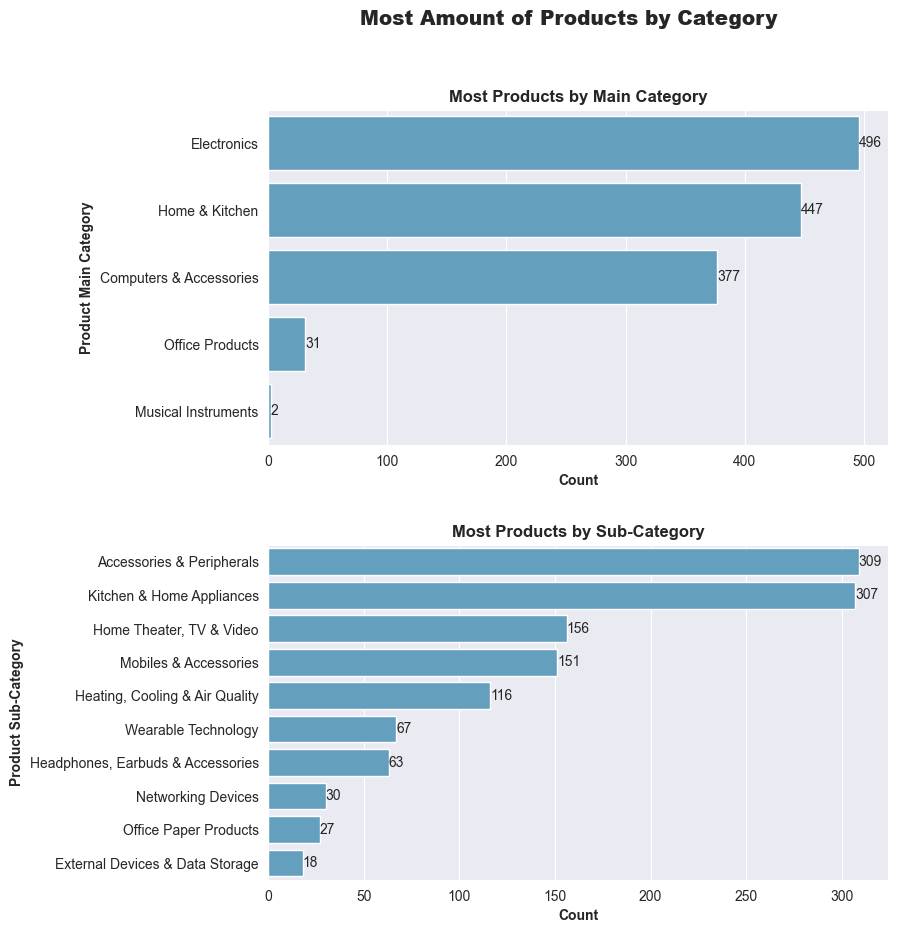

In [106]:
#Most amount of products by category

most_main_items = df1['category_1'].value_counts().head(5).rename_axis('category_1').reset_index(name='counts')

most_sub_items = df1['category_2'].value_counts().head(10).rename_axis('category_2').reset_index(name='counts')

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')

sns.barplot(ax=ax[0], data=most_main_items, x='counts', y='category_1')
sns.barplot(ax=ax[1], data=most_sub_items, x='counts', y='category_2')

plt.subplots_adjust(hspace = 0.3)

ax[0].set_xlabel('Count', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')

ax[1].set_xlabel('Count', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')

ax[0].set_title('Most Products by Main Category', fontweight='bold')
ax[1].set_title('Most Products by Sub-Category', fontweight='bold')


ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()


**Electronics especially acccessories & peripherals and kitchen & home appliances covers most of the products** in this dataset. In general, this dataset contains mostly products closely related to electric devices.

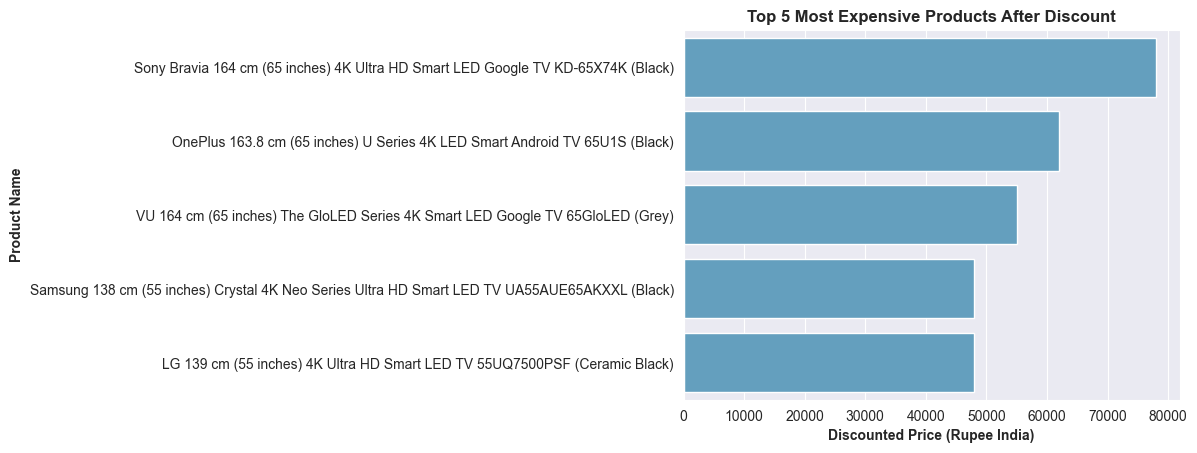

In [107]:
#Top 5 Most Expensive Products After Discount

disc_exp = sns.barplot(data=df1.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')

disc_exp.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
disc_exp.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_exp.set_ylabel('Product Name', fontweight='bold')

plt.show()

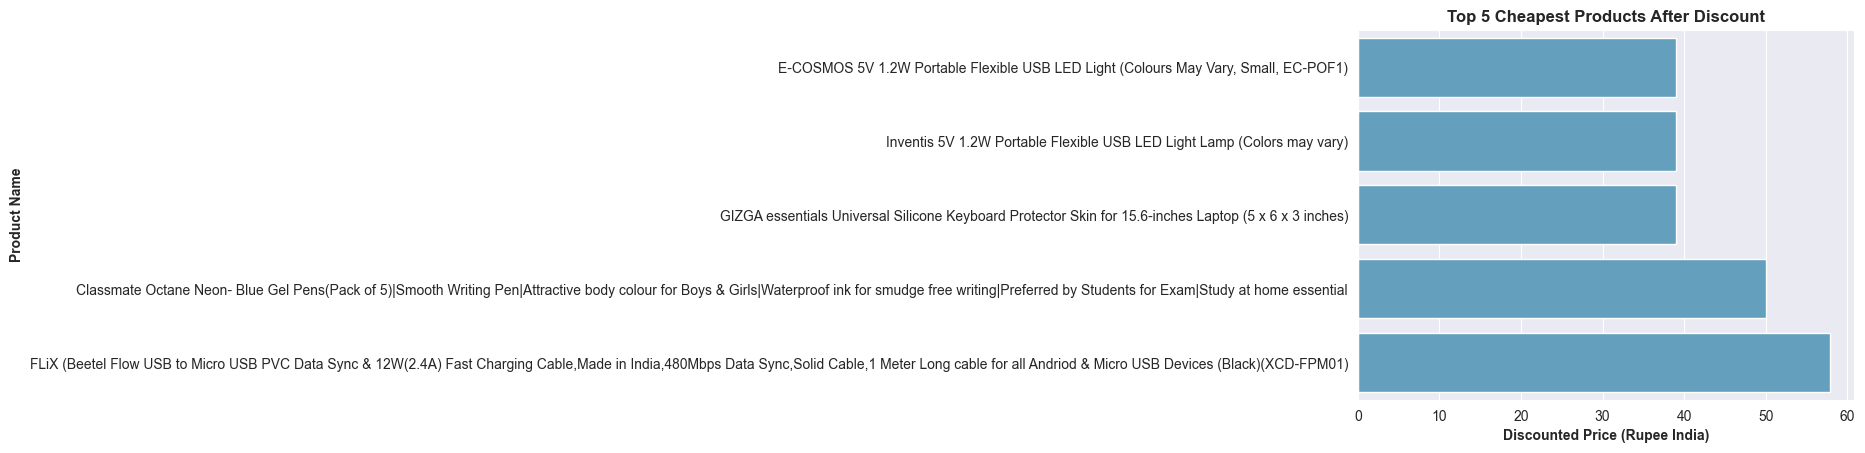

In [108]:
#Top 5 Cheapest Products After Discount

disc_cheap = sns.barplot(data=df1.sort_values('discounted_price').head(5), x='discounted_price', y='product_name')

disc_cheap.set_title('Top 5 Cheapest Products After Discount', fontweight='bold')
disc_cheap.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

plt.show()

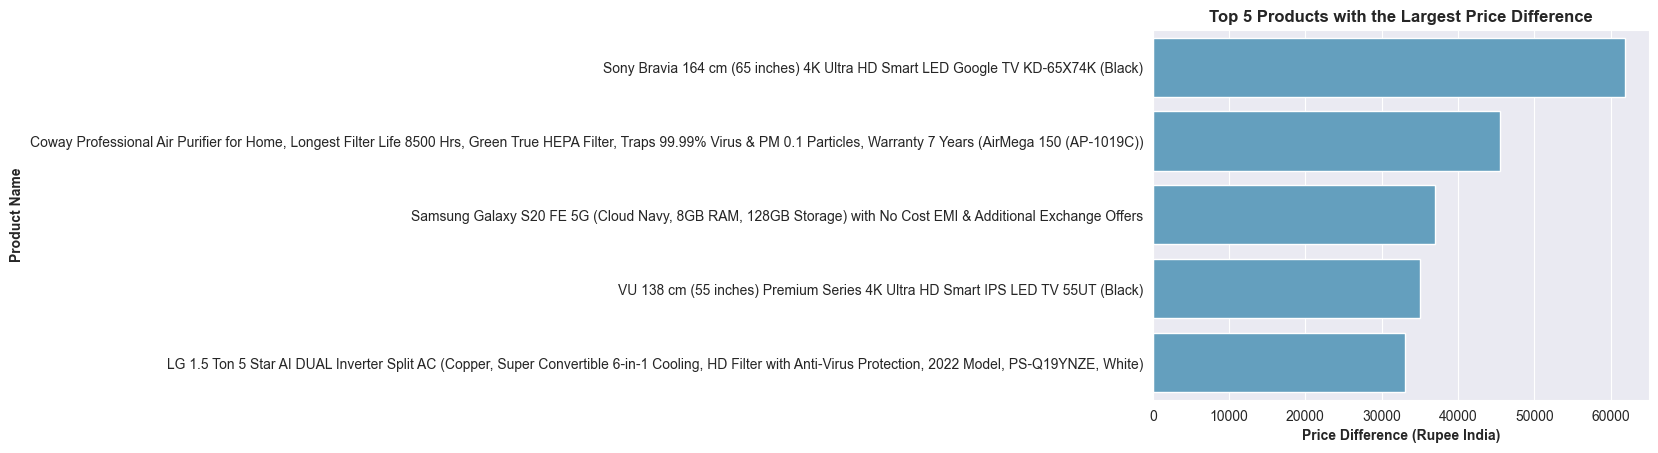

In [109]:
#Top 5 Products with the largest difference in price due to discount

dif_price_large = sns.barplot(data= df1.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='product_name')

dif_price_large.set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
dif_price_large.set_xlabel('Price Difference (Rupee India)', fontweight='bold')
dif_price_large.set_ylabel('Product Name', fontweight='bold')

plt.show()

## **Observation 2: Product Ratings**

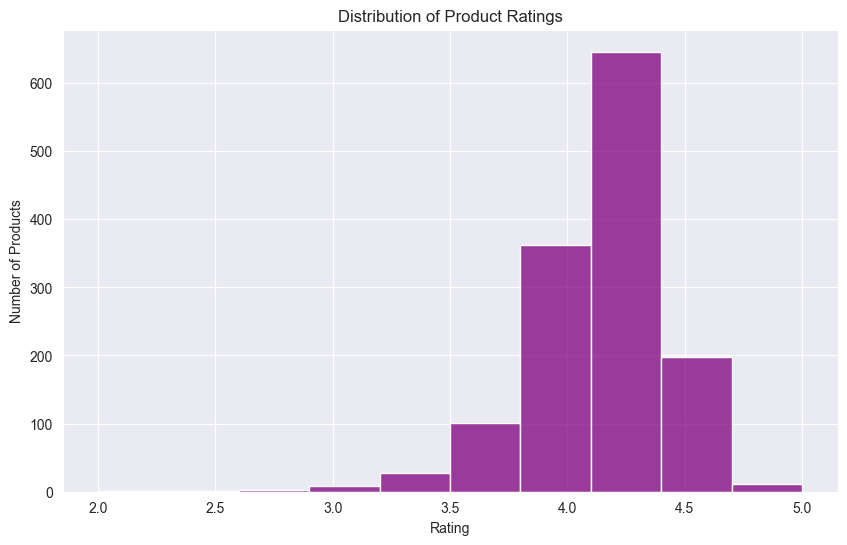

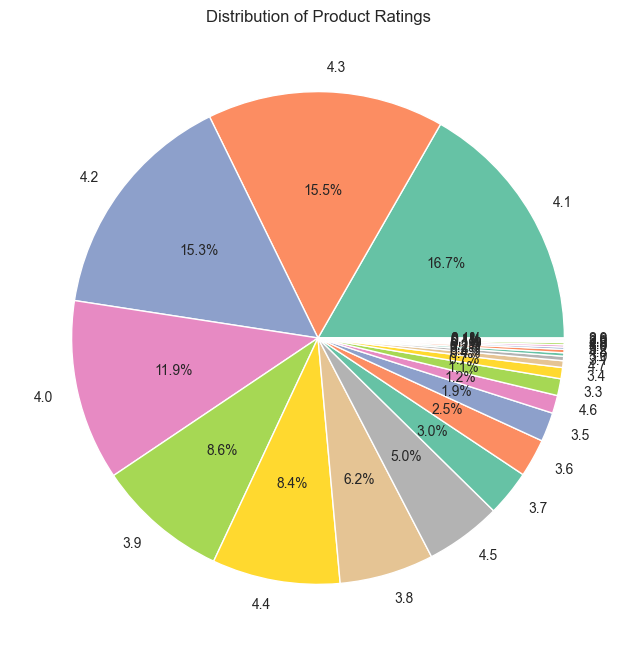

In [110]:
# Pie chart or Bar chart to show the distribution of ratings
plt.figure(figsize=(10, 6))

# Bar chart
sns.histplot(df['rating'].dropna(), kde=False, bins=10, color='purple')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.show()

# Or use Pie chart
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Product Ratings')
plt.show()

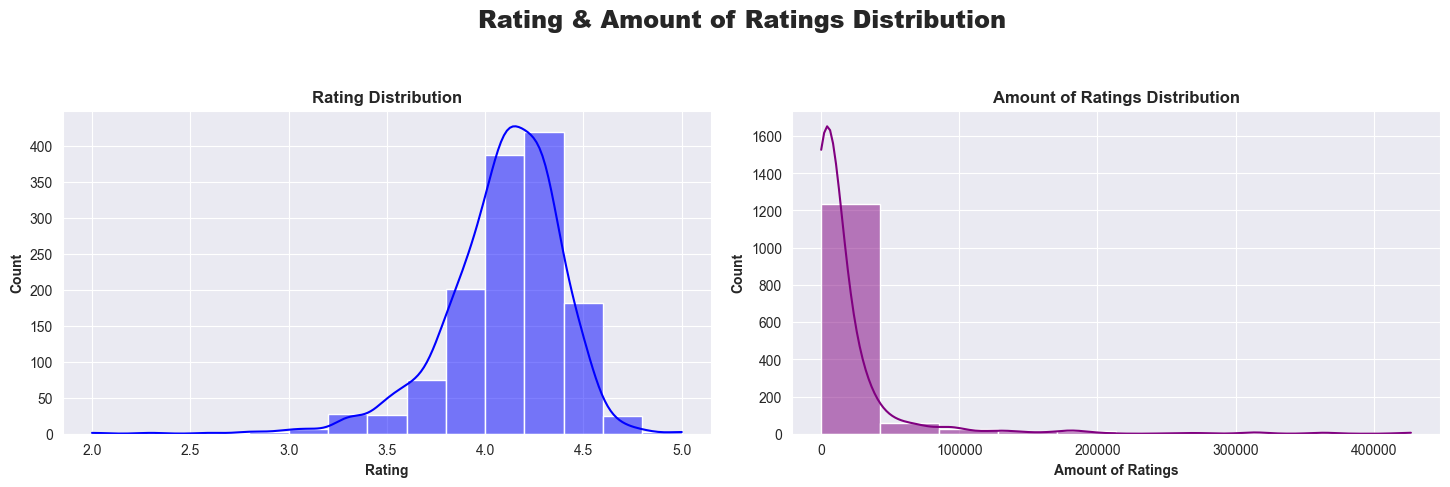

In [111]:
#Rating & Amount of Rating Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='rating', bins=15, kde=True, color='blue')
sns.histplot(ax=ax[1], data=df1, x='rating_count', bins=10, kde=True, color='purple')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Amount of Ratings Distribution', fontweight='bold')

plt.show()

Most of the product rating range around **4.0 - 4.375** with **no products under the score of 2.0**. The rating distribution in **slightly left-skewed**. 

The amount of ratings given to a product is very widespread. Most of the products that have been rated, have around **0 - 5000 amount of rating** for each product. Interestingly there are products that have more than 40,000 ratings. The amount of **ratings distribution is highly right skewed**.

C:\Users\NGUYET VIEN\AppData\Local\Temp\ipykernel_8140\4163676802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='product_name', data=top_rated_products, palette='coolwarm')


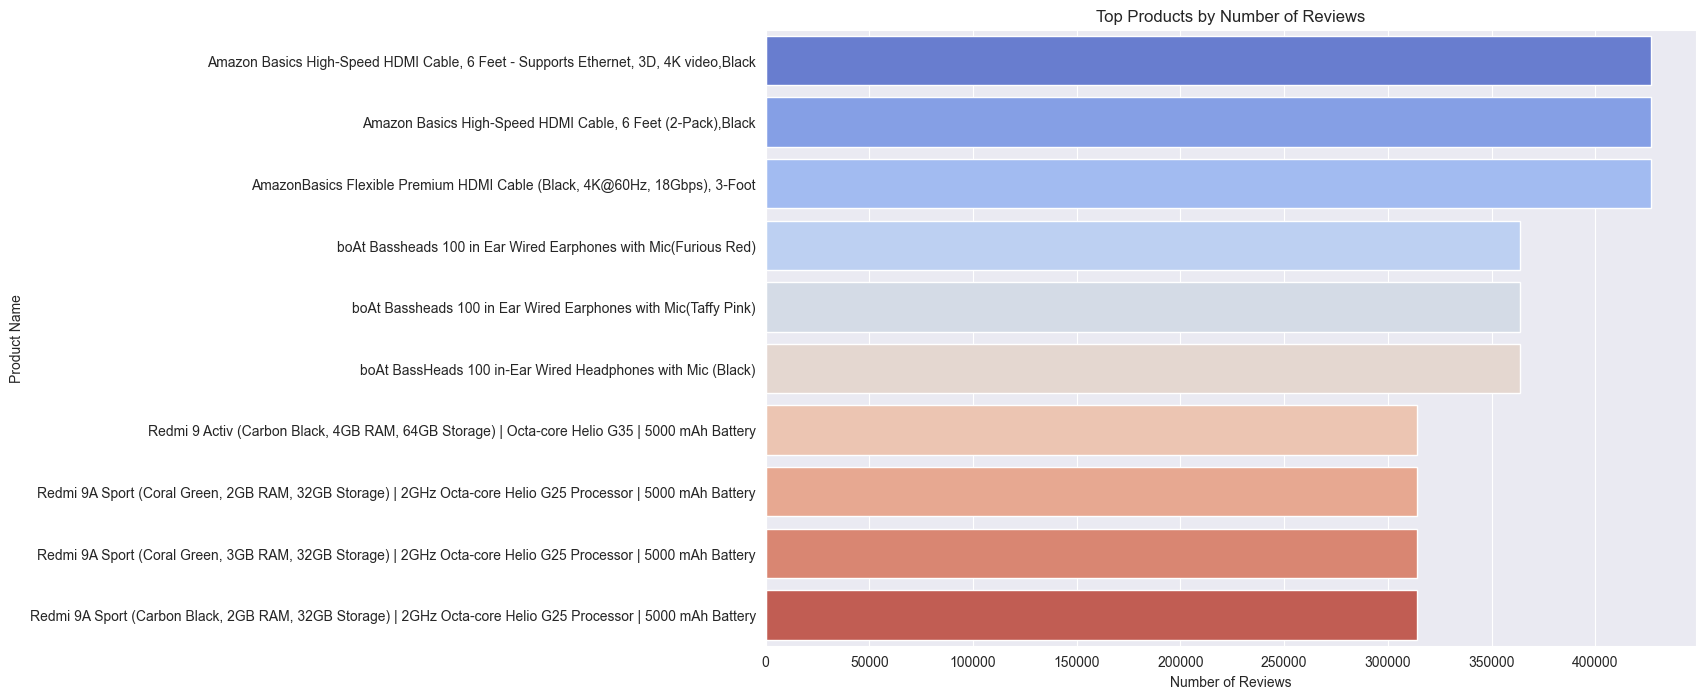

In [112]:
# Bar chart to show top products by number of reviews
top_rated_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='rating_count', y='product_name', data=top_rated_products, palette='coolwarm')
plt.title('Top Products by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

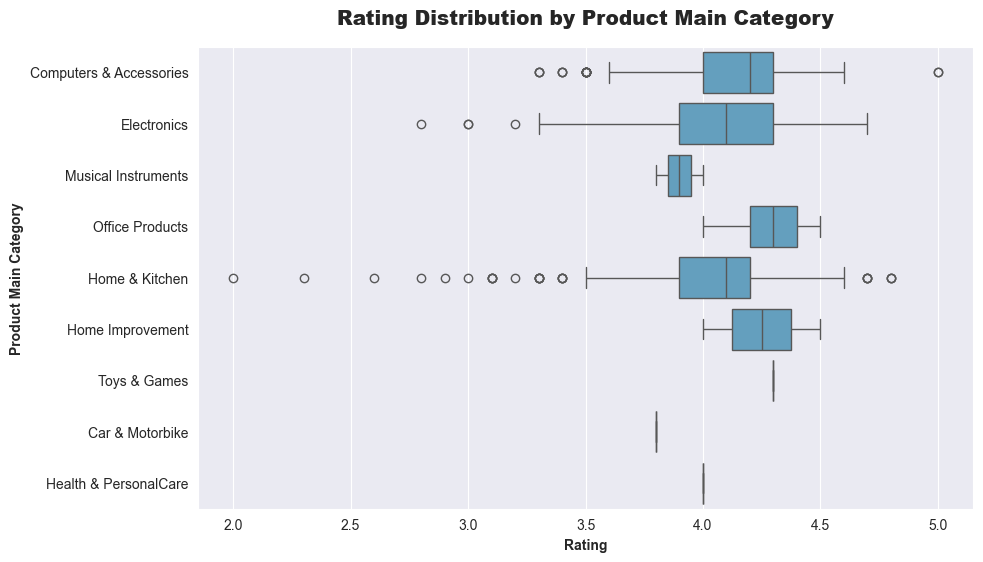

In [113]:
#Rating Distribution by Product Main Category

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax, data=df1, x='rating', y='category_1')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

**Toys & Games, Car & Motorbike, and Health & Personal Care** product ratings's are around **3.75 - 4.375**. **All Home Improvement, and Office Products** have a **minimal rating of 4.0**.

Many of the **Computer & Accessories, and Electronics** products have ratings in the range of  **3.6 - 4.6.** Though these categories do have products that have a high rating such as 5.0 and low rating, going down to 2.75.

Noticeably, the **Home & Kitchen products** have a really widespread rating going to as **high as 4.75** and going as **low as 2.0** rating, which is the lowest rating out of all the products in this dataset. However, most of the products in this category fall in the range of around **3.8 - 4.6**.

Above is the list of the amount of products under specific ratings for each main category.

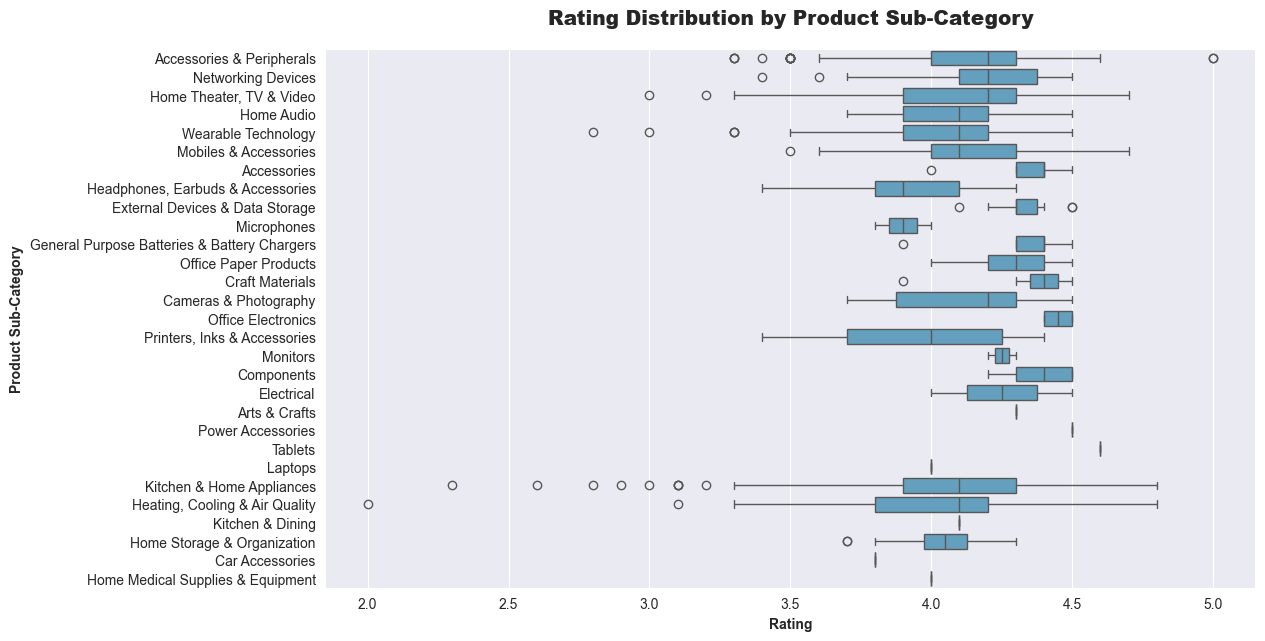

In [114]:
#Rating Distribution by Product Sub-Category

fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(ax=ax, data=df1, x='rating', y='category_2')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

**Most of the products** in this dataset have been rated **Above Average**. There are **extremely few products** that are rated **Below Average and Excellent**. **No products are rated as Poor** in this dataset. 

In [115]:
#Pivot table of Rating

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

rating_pivot = df1.pivot_table(values=['rating', 'rating_count'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))

rating_pivot = rating_pivot.rename(columns = {'rating':'Rating', 'rating_count': 'Rating Count', 'median':'Median', 'mean':'Mean'}, index={'category_1': 'Main Category', 'category_2': 'Sub Category'})

rating_pivot 

C:\Users\NGUYET VIEN\AppData\Local\Temp\ipykernel_8140\844893047.py:9: FutureWarning: The provided callable <function median at 0x00000277B6837EC0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  rating_pivot = df1.pivot_table(values=['rating', 'rating_count'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))
C:\Users\NGUYET VIEN\AppData\Local\Temp\ipykernel_8140\844893047.py:9: FutureWarning: The provided callable <function mean at 0x00000277B66EAB60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  rating_pivot = df1.pivot_table(values=['rating', 'rating_count'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))


p25  \
                                                                     Rating   
category_1              category_2                                            
Car & Motorbike         Car Accessories                               3.800   
Computers & Accessories Accessories & Peripherals                     4.000   
                        Components                                    4.300   
                        External Devices & Data Storage               4.300   
                        Laptops                                       4.000   
                        Monitors                                      4.225   
                        Networking Devices                            4.100   
                        Printers, Inks & Accessories                  3.700   
                        Tablets                                       4.600   
Electronics             Accessories                                   4.300   
                        Cameras & Photography                         3.875   
                        General Purpose Batteries & Battery Chargers  4.300   
                        Headphones, Earbuds & Accessories             3.800   
                        Home Audio                                    3.900   
                        Home Theater, TV & Video                      3.900   
                        Mobiles & Accessories                         4.000   
                        Power Accessories                             4.500   
                        Wearable Technology                           3.900   
Health & PersonalCare   Home Medical Supplies & Equipment             4.000   
Home & Kitchen          Craft Materials                               4.350   
                        Heating, Cooling & Air Quality                3.800   
                        Home Storage & Organization                   3.975   
                        Kitchen & Dining                              4.100   
                        Kitchen & Home Appliances                     3.900   
Home Improvement        Electrical                                    4.125   
Musical Instruments     Microphones                                   3.850   
Office Products         Office Electronics                            4.400   
                        Office Paper Products                         4.200   
Toys & Games            Arts & Crafts                                 4.300   

                                                                                   \
                                                                     Rating Count   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   1118.00   
Computers & Accessories Accessories & Peripherals                         1423.00   
                        Components                                        2515.00   
                        External Devices & Data Storage                  19747.50   
                        Laptops                                            323.00   
                        Monitors                                          2166.25   
                        Networking Devices                               10822.00   
                        Printers, Inks & Accessories                      3435.50   
                        Tablets                                           2886.00   
Electronics             Accessories                                      67259.00   
                        Cameras & Photography                             5384.25   
                        General Purpose Batteries & Battery Chargers      1269.50   
                        Headphones, Earbuds & Accessories                10259.50   
                        Home Audio                                        2625.75   
                        Home Theater, TV & Video                           404.75   
             

Above is the **specific data on ratings and the amount of rating** for each Main and Sub Category of Products from the dataset.

We can see that there are more than **500 people who reviewed a product and give rating anonymously** under the **alias of Amazon Customer, Place Holder, and Kindle Customer**.

There are **more than 8 people** who have given ratings and reviews to **more than 10 products** on this dataset. 

## **Observation 3: Product Pricing**

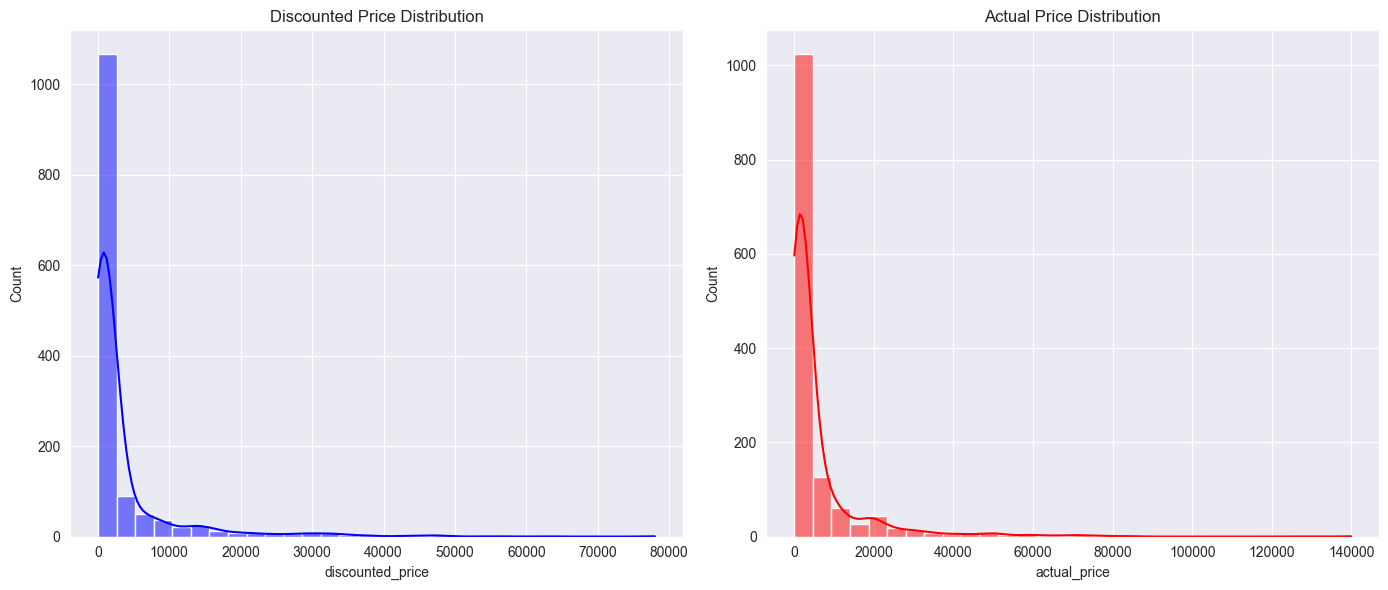

In [116]:
# Histogram to see the distribution of discounted price and actual price
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['discounted_price'].dropna(), kde=True, bins=30, color='blue')
plt.title('Discounted Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['actual_price'].dropna(), kde=True, bins=30, color='red')
plt.title('Actual Price Distribution')

plt.tight_layout()
plt.show()

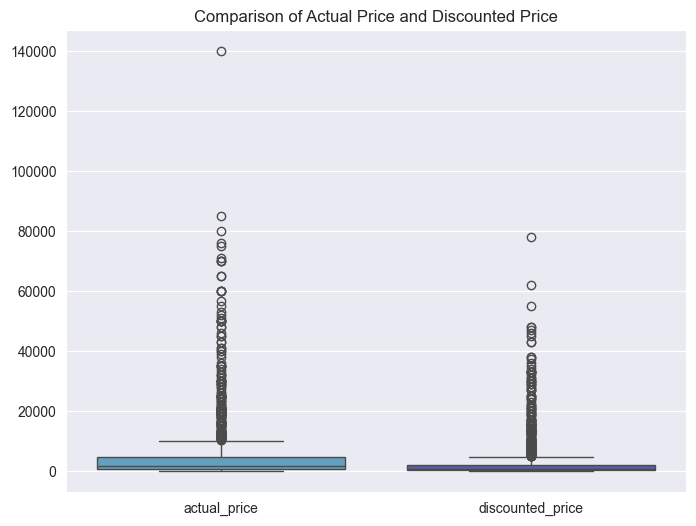

In [117]:
# Boxplot to compare actual price and discounted price
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['actual_price', 'discounted_price']])
plt.title('Comparison of Actual Price and Discounted Price')
plt.show()

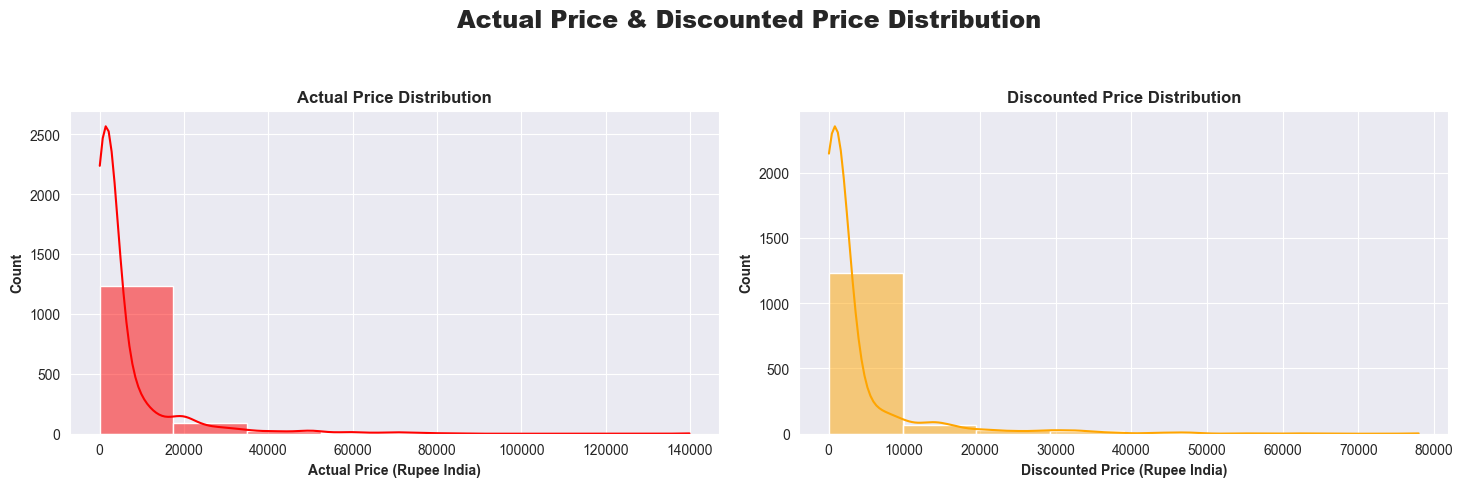

In [118]:
#Actual Price & Discounted Price Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Actual Price & Discounted Price Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='actual_price', bins=8, kde=True, color='red')
sns.histplot(ax=ax[1], data=df1, x='discounted_price', bins=8, kde=True, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Actual Price Distribution', fontweight='bold')
ax[1].set_title('Discounted Price Distribution', fontweight='bold')

plt.show()

Both graphs show the same distribution which is **Right or Positvely Skewed**.

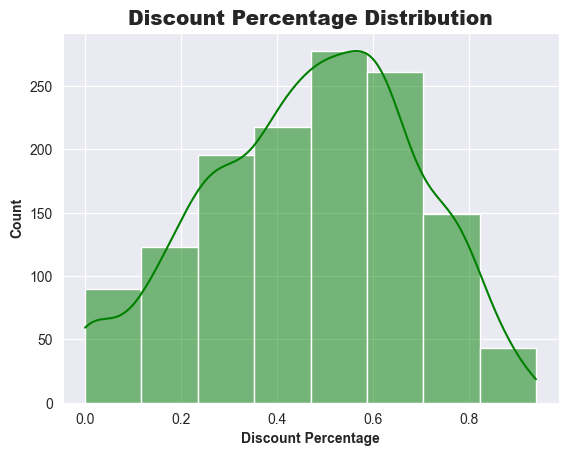

In [119]:
#Discount Percentage Distribution

disc_hist = sns.histplot(data=df1, x='discount_percentage', bins=8, kde=True, color='green')


disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')

plt.show()

Most products on the dataset have discounts at around **50% - 70%**.

In [120]:
#Specific Details about the Discount Percentage

df1['discount_percentage'].describe()

count    1358.000000
mean        0.468409
std         0.216481
min         0.000000
25%         0.310000
50%         0.490000
75%         0.627500
max         0.940000
Name: discount_percentage, dtype: float64

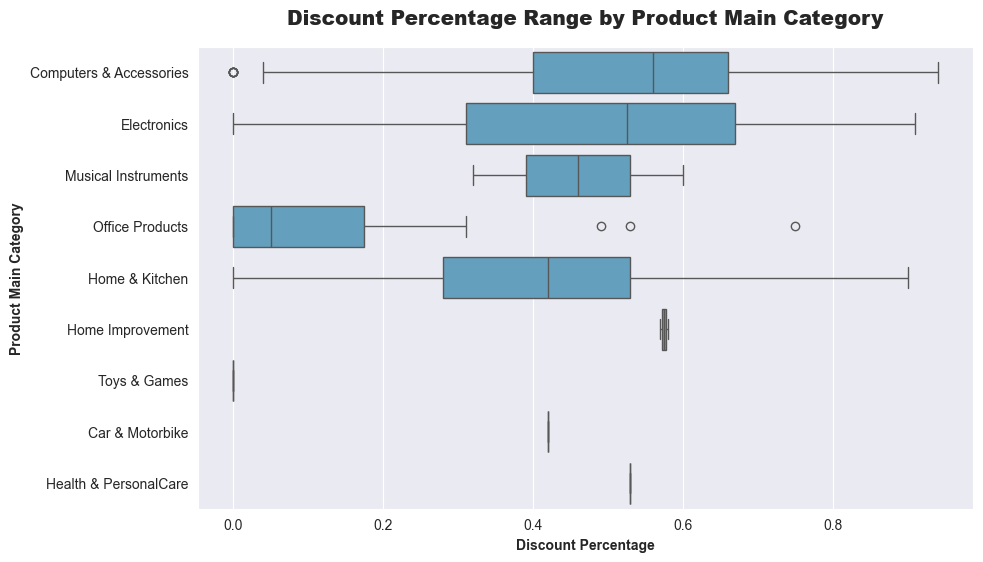

In [121]:
# The Discount Range by Product Main Category

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df1, x='discount_percentage', y='category_1')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Discount Percentage Range by Product Main Category', fontweight='heavy', size='x-large', y=1.03)


plt.show()


**Computers & Accessories, Electronics and Home & Kitchen** products have a **large spread of discount variation** ranging a minimal of 0% to more than 90% discount. 

**Toys & Games, Cars & Motorbikes, Health & Personal Care, and Home Improvement** have the **least spread** of discount variation.

**Office Products does not give a large amount of discount** compared to other products in the Main Category.

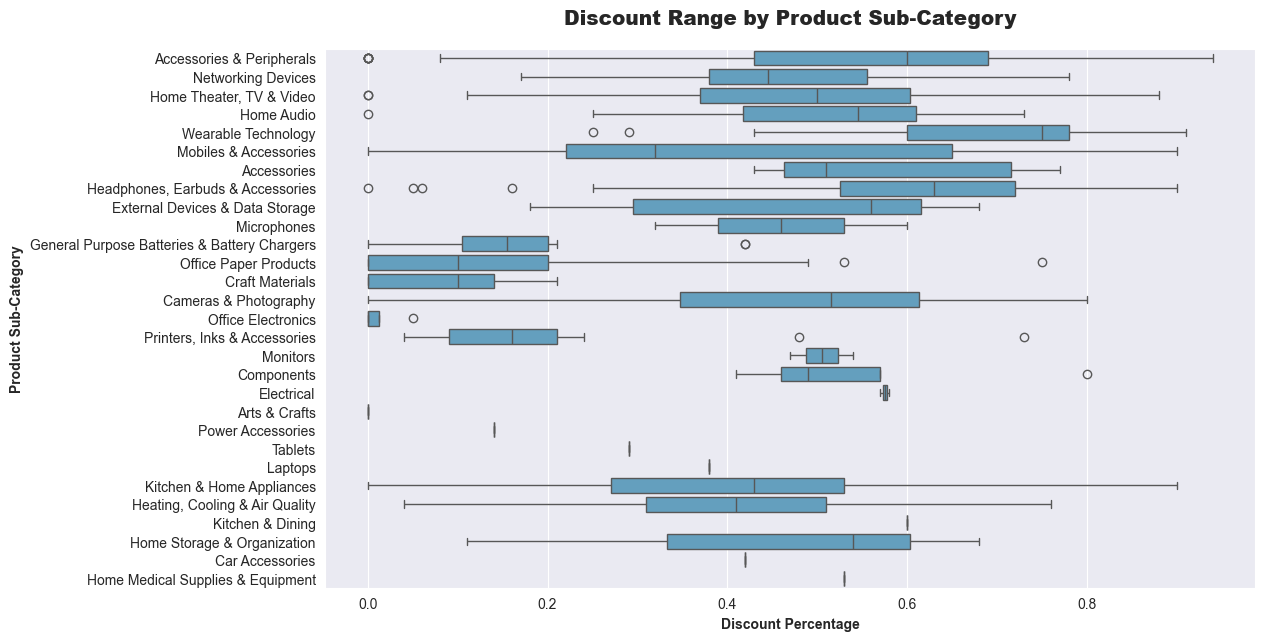

In [122]:
# The Discount Range by Product Sub-Category

fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(data=df1, x='discount_percentage', y='category_2')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Discount Range by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

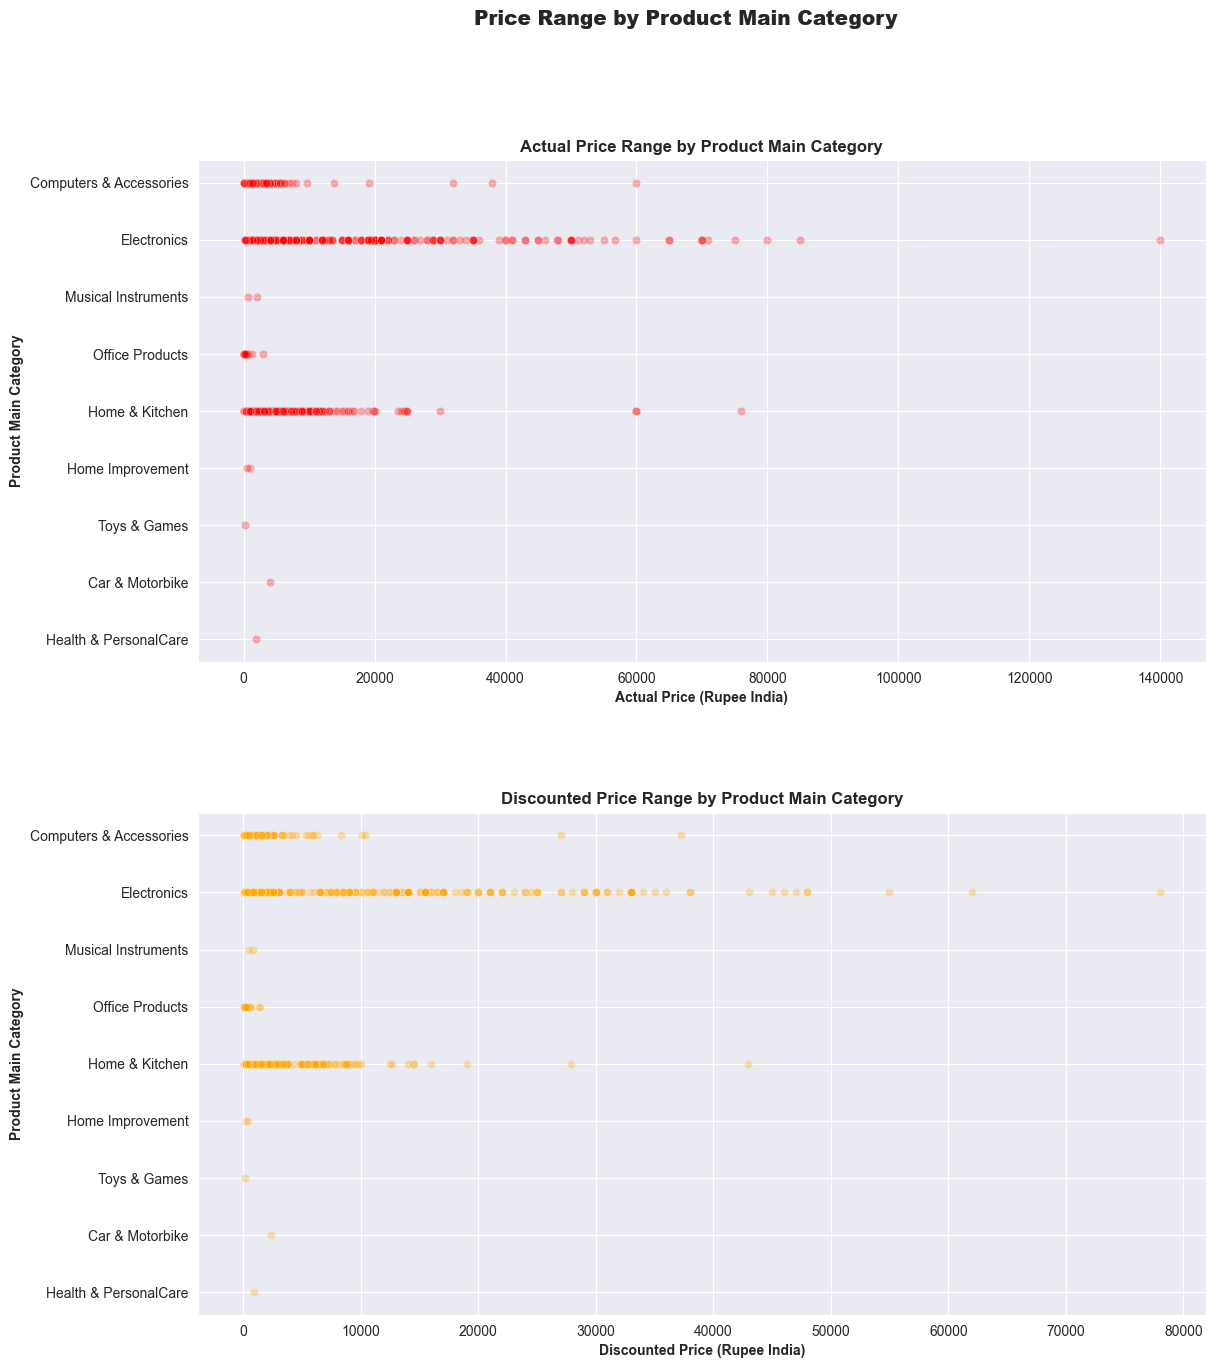

In [123]:
#Actual Price Range and Discounted Price Range by Product Main Category

fig, ax = plt.subplots(2, 1, figsize=(13,15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=df1, x='actual_price', y='category_1', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df1, x='discounted_price', y='category_1', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Main Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Main Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.3)

plt.show()

There is a significant decrease in price after discount especially in the Electronics Category. Most of the **product's actual price falls below 20,000 Rupee**. For the **discounted price**, most of the **products fall under 10,000 Rupee**.

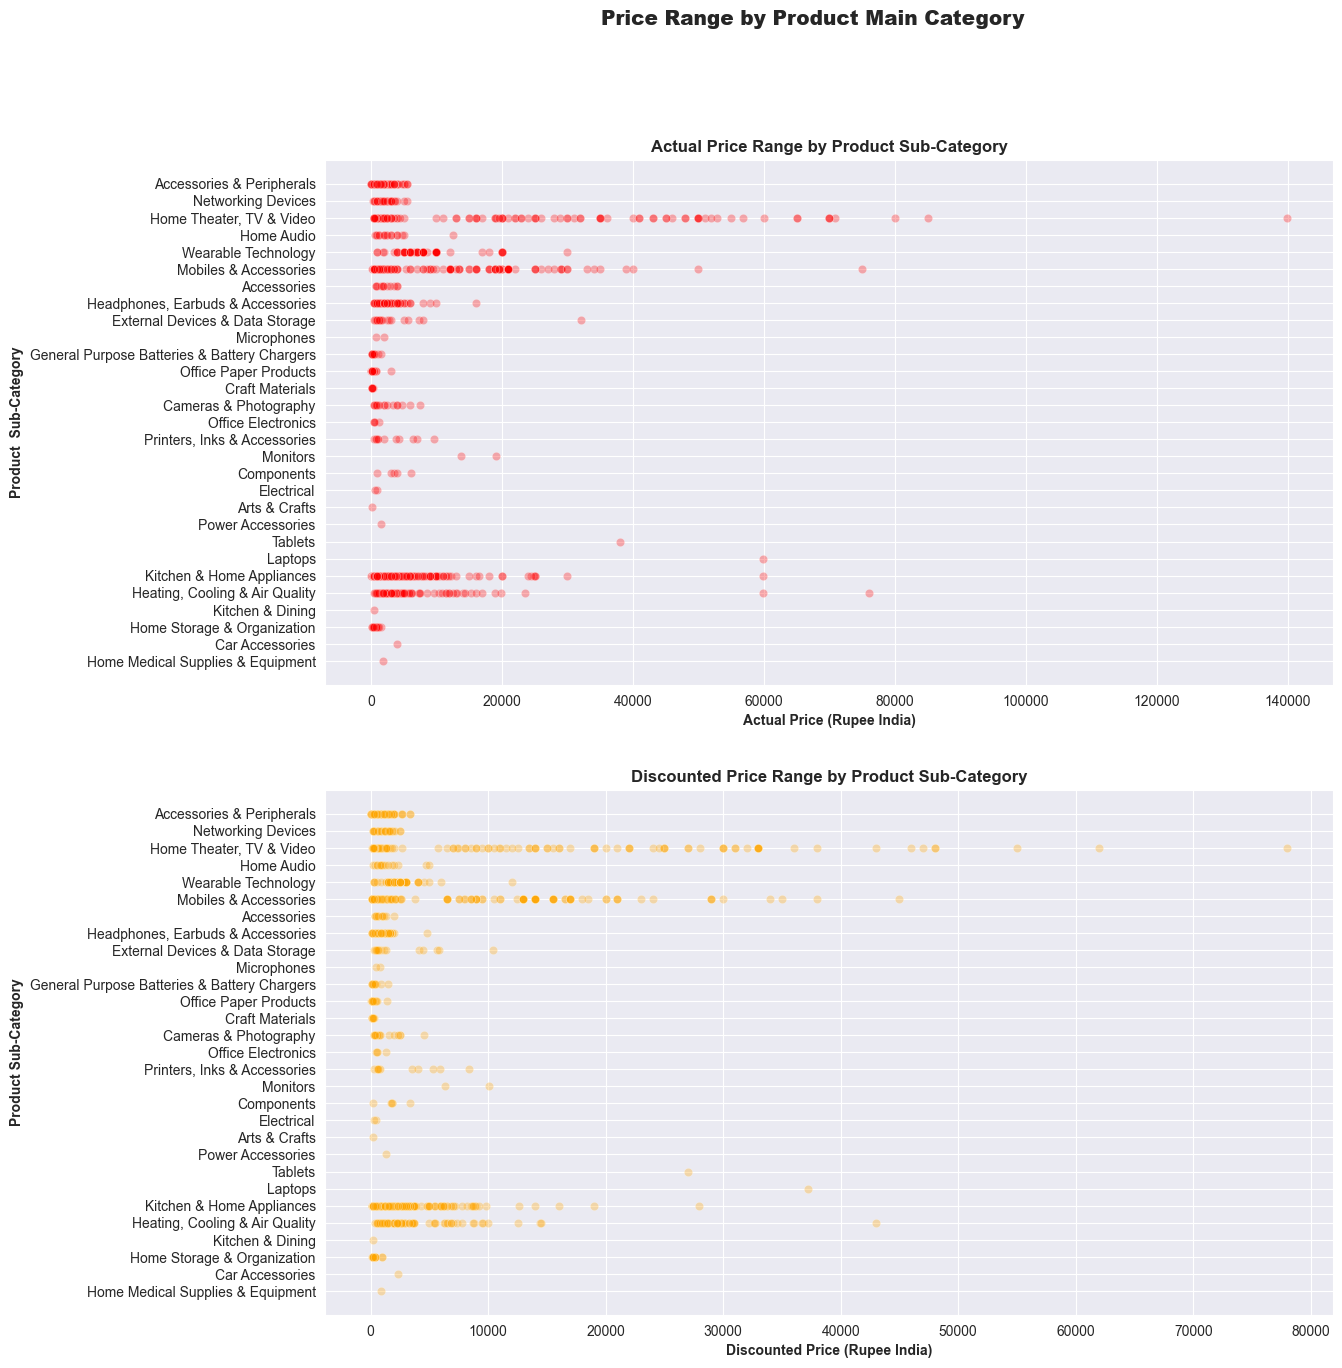

In [124]:
#Actual Price Range and Discounted Price Range by Product Sub Category

fig, ax = plt.subplots(2, 1, figsize=(13, 15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=df1, x='actual_price', y='category_2', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df1, x='discounted_price', y='category_2', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product  Sub-Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Sub-Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Sub-Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.2)

plt.show()